In [1]:
import pandas as pd
import os
import regex as re
import time

import plotly as px
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style="whitegrid")




In [2]:
df = pd.DataFrame(columns=['year', 'month', 'weekend' , 'searchby', 'origin', 'destiny', 'mean_time_s', 'std_time_s'])

lista_datos = os.listdir("data/Q-MonthlyAggregate/")

for f in lista_datos :
    data = pd.read_csv(f"data/Q-MonthlyAggregate/{f}")
    data["year"]  = int(re.findall(r"\d{4}",f)[0])
    if   "Weekdays"         in f : data["weekend"] = 0 # weekday=0   weekend=1
    elif "Weekends"         in f : data["weekend"] = 1
    
    if   "barrios"          in f : data["searchby"] = 0 # zip_code=1  neighborhood=0
    elif "codigos_postales" in f : data["searchby"] = 1 
        
    data.drop(columns=["geometric_mean_travel_time","geometric_standard_deviation_travel_time"],inplace=True)
    data = data.rename(columns={'mean_travel_time'              : 'mean_time_s',
                                'standard_deviation_travel_time': 'std_time_s' ,
                                'sourceid'                      : 'origin'     ,
                                'dstid'                         : 'destiny'    })    
    data[['mean_time_s', 'std_time_s']].astype(int)
    
    df = pd.concat([df, data])

df['year'       ] = df['year'       ].astype(int)
df['month'      ] = df['month'      ].astype(int)
df['weekend'    ] = df['weekend'    ].astype(bool)
df['searchby'   ] = df['searchby'   ].astype(bool)
df['origin'     ] = df['origin'     ].astype(int)
df['destiny'    ] = df['destiny'    ].astype(int)
df['mean_time_s'] = df['mean_time_s'].astype(int)
df['std_time_s' ] = df['std_time_s' ].astype(int)
df['mean_time_m'] = df['mean_time_s']/60
df['std_time_m' ] = df['std_time_s' ]/60
df = df.reset_index(drop=True)
df

FileNotFoundError: [Errno 2] No such file or directory: 'data/Q-MonthlyAggregate/'

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1694316 entries, 0 to 1694315
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   year         int64  
 1   month        int64  
 2   weekend      bool   
 3   searchby     bool   
 4   origin       int64  
 5   destiny      int64  
 6   mean_time_s  int64  
 7   std_time_s   int64  
 8   mean_time_m  float64
 9   std_time_m   float64
dtypes: bool(2), float64(2), int64(6)
memory usage: 106.6 MB


In [4]:
df.describe()

,year,month,origin,destiny,mean_time_s,std_time_s,mean_time_m,std_time_m
count,1.694316e+06,1.694316e+06,1.694316e+06,1.694316e+06,1.694316e+06,1.694316e+06,1.694316e+06,1.694316e+06
mean,2.018328e+03,6.334392e+00,7.744926e+01,7.982954e+01,8.735429e+02,3.806274e+02,1.455905e+01,6.343789e+00
std,9.241161e-01,3.557320e+00,7.244650e+01,7.366253e+01,3.831190e+02,1.536555e+02,6.385316e+00,2.560925e+00
min,2.017000e+03,1.000000e+00,1.000000e+00,1.000000e+00,3.300000e+01,3.000000e+00,5.500000e-01,5.000000e-02
25%,2.018000e+03,3.000000e+00,2.600000e+01,2.700000e+01,5.950000e+02,2.820000e+02,9.916667e+00,4.700000e+00
50%,2.018000e+03,6.000000e+00,5.500000e+01,5.700000e+01,8.640000e+02,3.570000e+02,1.440000e+01,5.950000e+00
75%,2.019000e+03,9.000000e+00,1.010000e+02,1.040000e+02,1.133000e+03,4.480000e+02,1.888333e+01,7.466667e+00
max,2.020000e+03,1.200000e+01,2.990000e+02,2.990000e+02,3.731000e+03,3.346000e+03,6.218333e+01,5.576667e+01


In [ ]:
df.to_csv("data/All_joined.csv")

In [ ]:
#Lo exporto a pickle para leerlo desde streamlit
df.to_pickle("data/All_joined.pkl")

# Exploratory Data Analysis

In [3]:
df = pd.read_csv("data/Uber/traveltimes/ddd/All_joined.csv" ,index_col=0)

In [4]:
df.head()

,year,month,weekend,searchby,origin,destiny,mean_time_s,std_time_s,mean_time_m,std_time_m
0,2017,3,False,False,17,43,1107,446,18.450000,7.433333
1,2017,3,False,False,49,24,1127,519,18.783333,8.650000
2,2017,3,False,False,42,94,1028,677,17.133333,11.283333
3,2017,2,False,False,4,129,1298,468,21.633333,7.800000
4,2017,3,False,False,48,34,318,261,5.300000,4.350000


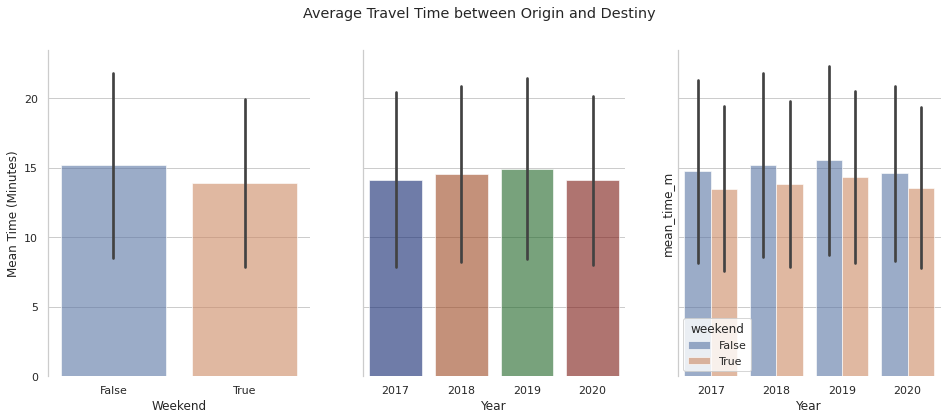

In [5]:
# Set up the matplotlib figure
f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(16, 6), sharey=True)
f.suptitle("Average Travel Time between Origin and Destiny")

sns.barplot( data=df, x="weekend", y="mean_time_m", ci="sd", palette="deep", alpha=.6 , ax=ax1 )
ax1.set_xlabel("Weekend")
ax1.set_ylabel("Mean Time (Minutes)")

# Center the data to make it diverging
sns.barplot( data=df, x="year", y="mean_time_m", ci="sd", palette="dark", alpha=.6 , ax=ax2)
ax2.set_xlabel("Year")
ax2.set_ylabel("")

sns.barplot( data=df, x="year", y="mean_time_m", hue="weekend", ci="sd", palette="deep", alpha=.6, ax=ax3)
ax3.set_xlabel("Year")

# Finalize the plot
sns.despine(bottom=True)


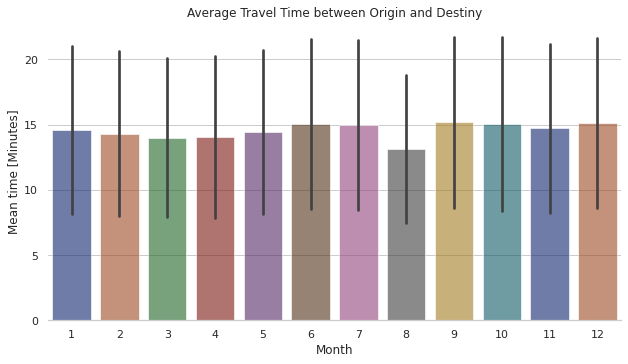

In [6]:
g = sns.catplot( 
                data=df, kind="bar",
                x="month", 
                y="mean_time_m", 
                ci="sd", palette="dark", alpha=.6,
                height=5, aspect=16/9                
               );
g.despine(left=True);
g.set_axis_labels("Month", "Mean time [Minutes]");
g.set(title="Average Travel Time between Origin and Destiny");

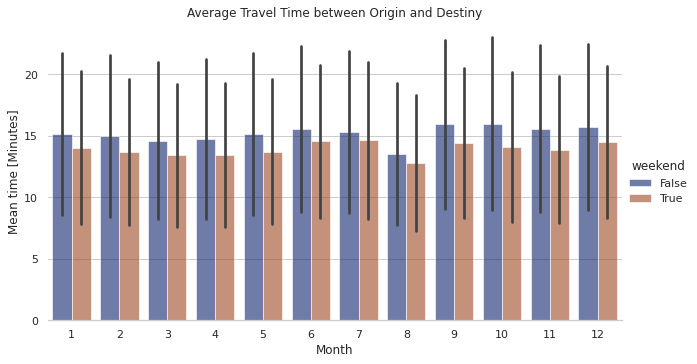

In [7]:
g = sns.catplot( 
                data=df, kind="bar",
                x="month", 
                y="mean_time_m", 
                hue="weekend",
                ci="sd", palette="dark", alpha=.6,
                height=5, aspect=16/9                
               );
g.despine(left=True)
g.set_axis_labels("Month", "Mean time [Minutes]");
g.set(title="Average Travel Time between Origin and Destiny");

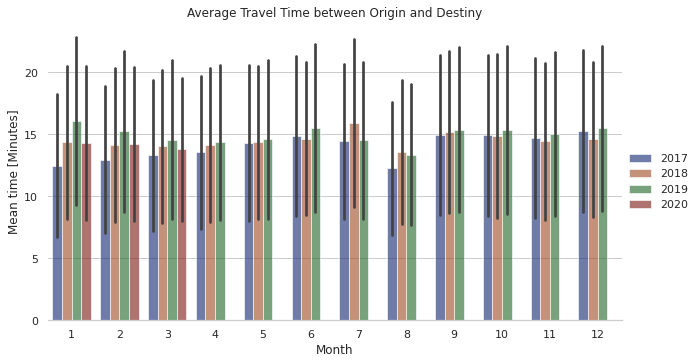

In [8]:
g = sns.catplot( 
                data=df, kind="bar",
                x="month", 
                y="mean_time_m", 
                hue="year",
                ci="sd", palette="dark", alpha=.6,
                height=5, aspect=16/9                
               );
g.despine(left=True);
g.set_axis_labels("Month", "Mean time [Minutes]");
g.set(title="Average Travel Time between Origin and Destiny");
g.legend.set_title("");

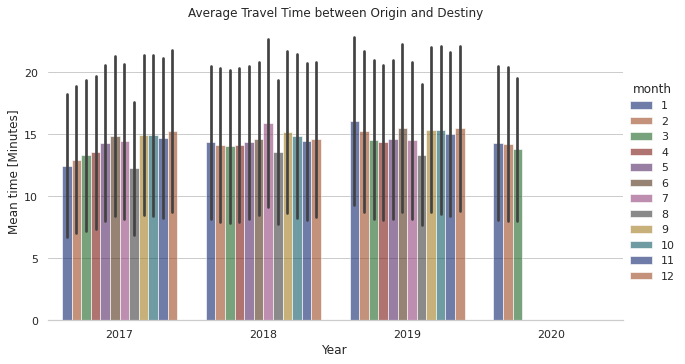

In [9]:
g = sns.catplot( 
                data=df, kind="bar",
                x="year", 
                y="mean_time_m", 
                hue="month",
                ci="sd", palette="dark", alpha=.6,
                height=5, aspect=16/9                
               );
g.despine(left=True);
g.set_axis_labels("Year", "Mean time [Minutes]");
g.set(title="Average Travel Time between Origin and Destiny");

Como lo vamos a hacer con plotly y luego lo visualizamos en streamlit: lo hago aquí para luego pasarlo a streamlit https://plotly.com/python/line-charts/

In [10]:
# Parametrización para hacer gráficos:
# de momento manual, el objetivo es que sea a traves de streamlit

ano       = 2019
mes       = 1
finde     = True  # weekend=True   weekday=False
buscarpor = True  # zip_code=True  neighborhood=False
origen    = 1
destino   = 2


In [11]:
newdf = df[
#            (df.year     == ano       ) & 
#            (df.month    == mes       ) &
            (df.weekend  == finde     ) &
            (df.searchby == buscarpor ) &
            (df.origin   == origen    ) &
            (df.destiny  == destino   ) 
          ]
newdf = newdf.reset_index(drop=True)

In [12]:
newdf

,year,month,weekend,searchby,origin,destiny,mean_time_s,std_time_s,mean_time_m,std_time_m
0,2017,1,True,True,1,2,511,328,8.516667,5.466667
1,2017,2,True,True,1,2,498,329,8.300000,5.483333
2,2017,3,True,True,1,2,488,283,8.133333,4.716667
3,2017,6,True,True,1,2,518,319,8.633333,5.316667
4,2017,4,True,True,1,2,505,299,8.416667,4.983333
5,2017,5,True,True,1,2,496,289,8.266667,4.816667
6,2017,9,True,True,1,2,513,336,8.550000,5.600000
7,2017,7,True,True,1,2,472,290,7.866667,4.833333
8,2017,8,True,True,1,2,429,266,7.150000,4.433333
9,2017,11,True,True,1,2,502,313,8.366667,5.216667


In [13]:
monthdf = df.groupby("month").agg({"mean_time_m":'mean'})

fig = px.bar(monthdf, y="mean_time_m", 
             title=f'Average travel time from Origin to Destiny',
             labels={"index": "month"})
fig.show()

NameError: name 'px' is not defined

In [14]:
monthdf


,mean_time_m
month,
1,14.589153
2,14.314388
3,14.004887
4,14.067955
5,14.420221
6,15.058132
7,14.977035
8,13.149203
9,15.173399
